/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_92316/1259213344.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_92316/1259213344.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




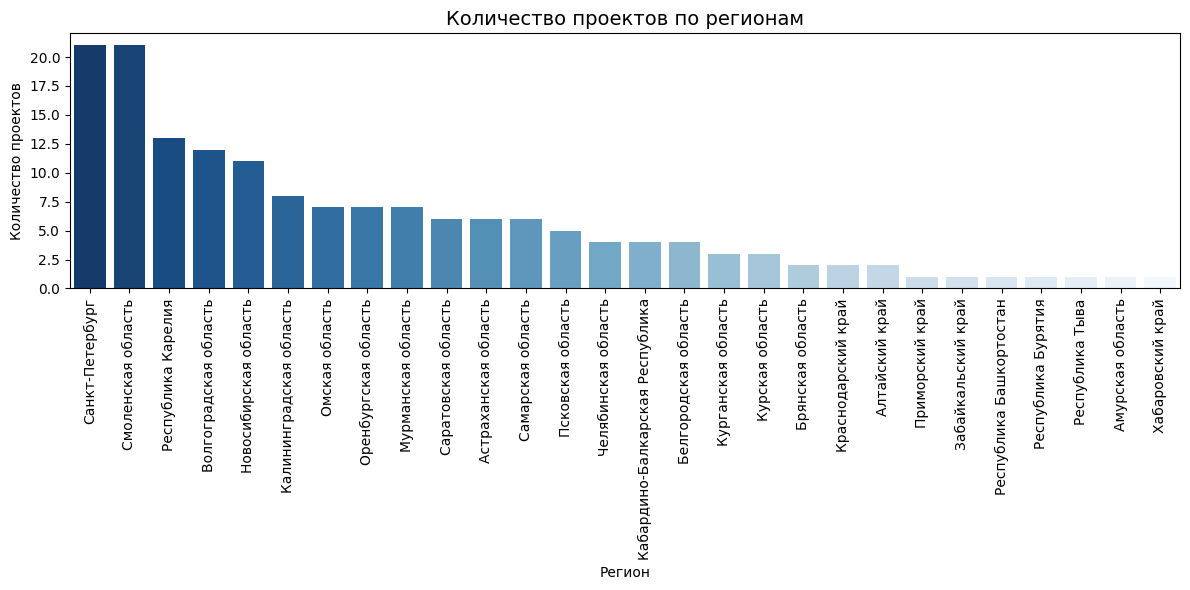

In [24]:
# 1. Импорт библиотек
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# 2. Настройки подключения к БД
db_config = {
    'host': 'localhost',
    'database': 'projectsdb',
    'user': 'root',
    'password': 'NewStrongPassword'
}

# 3. Читаем SQL-запрос из файла
query_file = "../sql_queries/6_funding_ranking.sql"

# 4. Функция для выполнения запроса и загрузки данных
def execute_query(query_file):
    with open(query_file, 'r', encoding='utf-8') as file:
        query = file.read()
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# 5. Загружаем данные
df = execute_query(query_file)

# === Визуализация 1: Количество проектов по регионам ===
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('Количество_проектов', ascending=False)
sns.barplot(x='Регион', y='Количество_проектов', data=df_sorted, palette="Blues_r")
plt.xticks(rotation=90)
plt.title('Количество проектов по регионам', fontsize=14)
plt.xlabel('Регион')
plt.ylabel('Количество проектов')
plt.tight_layout()
plt.show()

# === Таблица 1: Общая сумма финансирования ===
df_total = df.sort_values('Общая_сумма', ascending=False).reset_index(drop=True)
df_total['Место'] = df_total.index + 1
# Применяем форматирование чисел
df_total['Общая_сумма'] = df_total['Общая_сумма'].apply(lambda x: f'{x:,.2f}')
df_total = df_total[['Место', 'Регион', 'Общая_сумма']]

fig_total = go.Figure(data=[go.Table(
    header=dict(values=['<b>Место</b>', '<b>Регион</b>', '<b>Общая сумма (₽)</b>'],
                fill_color='lightgreen',
                align='center'),
    cells=dict(values=[df_total.Место, df_total.Регион, df_total.Общая_сумма],
               fill_color='white',
               align='center'))
])
fig_total.update_layout(
    title='Рейтинг регионов по общей сумме финансирования',
    height=800,
    showlegend=False
)

fig_total.show()

# === Таблица 2: Средняя сумма на проект ===
df_avg = df.sort_values('Средняя_сумма', ascending=False).reset_index(drop=True)
df_avg['Место'] = df_avg.index + 1
# Применяем форматирование чисел
df_avg['Средняя_сумма'] = df_avg['Средняя_сумма'].apply(lambda x: f'{x:,.2f}')
df_avg = df_avg[['Место', 'Регион', 'Средняя_сумма']]

fig_avg = go.Figure(data=[go.Table(
    header=dict(values=['<b>Место</b>', '<b>Регион</b>', '<b>Средняя сумма (₽)</b>'],
                fill_color='lightcoral',
                align='center'),
    cells=dict(values=[df_avg.Место, df_avg.Регион, df_avg.Средняя_сумма],
               fill_color='white',
               align='center'))
])
fig_avg.update_layout(
    title='Рейтинг регионов по средней сумме финансирования на проект',
    height=800,
    showlegend=False
)

fig_avg.show()
